# 1. Linear Regression

### 공부 시간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("../database/LinearRegressionData.csv")
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [3]:
X = dataset.iloc[:, :-1].values  # 처음부터 마지막 컬럼 직전까지의 데이터 (독립변수)
y = dataset.iloc[:, -1].values  # 마지막 컬럼 데이터 (종속변수 - 결과)

In [4]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()  # 객체 생성
reg.fit(X, y)  # 학습 (모델 생성)

LinearRegression()

In [6]:
y_pred = reg.predict(X)  # 주어진 X 에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

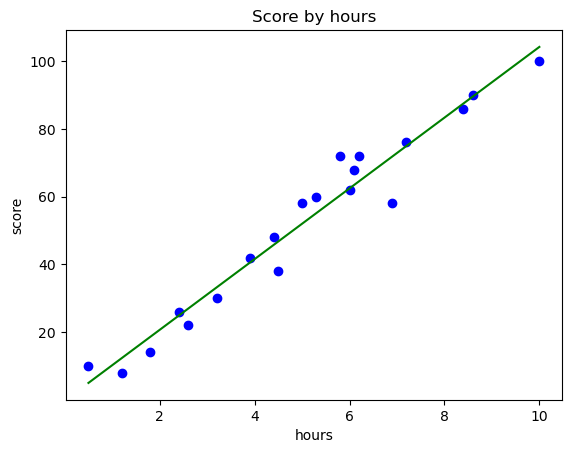

In [7]:
plt.scatter(X, y, c="b")  # 산점도
plt.plot(X, y_pred, c="g")  # 선 그래프
plt.title("Score by hours")
plt.xlabel("hours")  # X 축 이름
plt.ylabel("score")  # Y 축 이름
plt.show()

In [8]:
print("9시간 공부했을 때 예상 점수:", reg.predict([[9]]))
# print(reg.predict([[9], [8], [7]]))

9시간 공부했을 때 예상 점수: [93.77478776]


In [9]:
reg.coef_  # 기울기 (m)

array([10.44369694])

In [10]:
reg.intercept_  # y 절편 (b)

-0.21848470286721522

### 데이터 세트 분리

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset = pd.read_csv("../database/LinearRegressionData.csv")

In [13]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)  # 훈련 80 : 테스트 20 으로 분리

In [15]:
X, len(X)  # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [16]:
X_train, len(X_train)  # 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [17]:
X_test, len(X_test)  # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [18]:
y_train, len(y_train)  # 훈련 세트 y, 개수

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [19]:
y_test, len(y_test)  # 테스트 세트 y, 개수

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [21]:
reg.fit(X_train, y_train)  # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

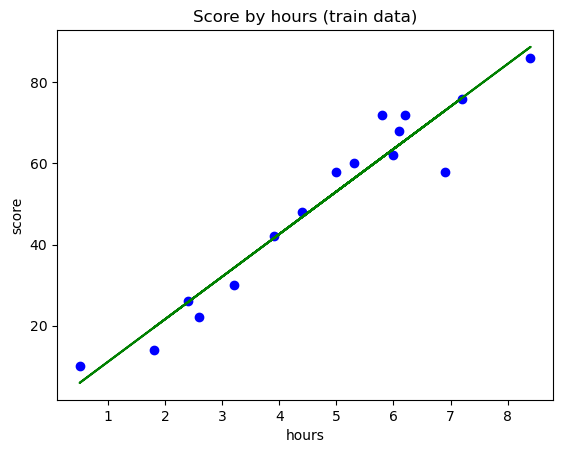

In [22]:
plt.scatter(X_train, y_train, c="b")
plt.plot(X_train, reg.predict(X_train), c="g")
plt.title("Score by hours (train data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (테스트 세트)

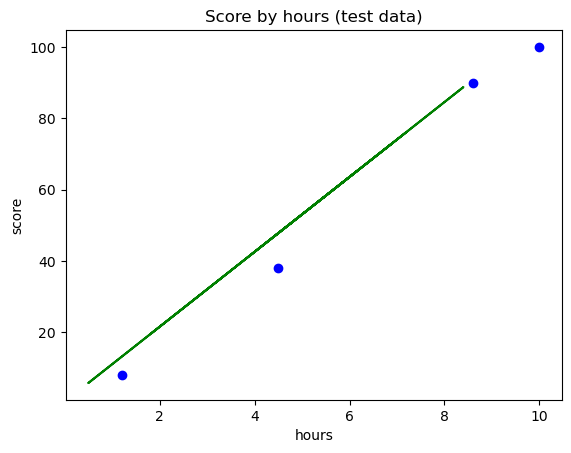

In [23]:
plt.scatter(X_test, y_test, c="b")
plt.plot(X_train, reg.predict(X_train), c="g")
plt.title("Score by hours (test data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [24]:
reg.coef_

array([10.49161294])

In [25]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [26]:
reg.score(X_train, y_train)  # 훈련 세트를 통한 모델 평가

0.9356663661221668

In [27]:
reg.score(X_test, y_test)  # 테스트 세트를 통한 모델 평가

0.9727616474310156

## 경사 하강법 (Gradient Descent)

max_iter: 훈련 세트 반복 횟수 (Epoch 수)

eta0: 학습률 (learning rate)

In [28]:
# SGD: Stochasitc Gradient Descent, 확률적 경사 하강법
from sklearn.linear_model import SGDRegressor

# 지수표기법
# 1e-3: 0.001 (10^-3)
# 1e-4: 0.0001 (10^-4)
# 1e+3: 1000 (10^3)
# 1e+4: 10000 (10^4)

sr = SGDRegressor()
# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=0)  # epoch 확인하려고 verbose=1 하면 오류남, 이유는 모름..
sr.fit(X_train, y_train)

SGDRegressor()

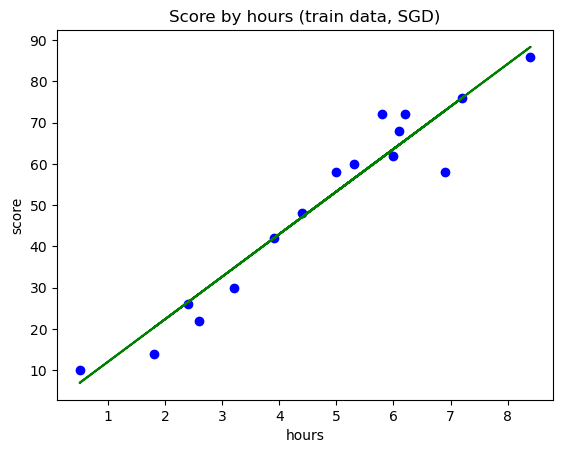

In [29]:
plt.scatter(X_train, y_train, c="b")
plt.plot(X_train, sr.predict(X_train), c="g")
plt.title("Score by hours (train data, SGD)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [30]:
sr.coef_, sr.intercept_

(array([10.31492737]), array([1.73417488]))

In [31]:
sr.score(X_train, y_train)

0.9352436981602569

In [32]:
sr.score(X_test, y_test)

0.9710676627486519